# ___Decision Boundaries___
------------

In [6]:
import numpy as np
np.random.seed(2024 - 5 - 19)
import matplotlib.pyplot as plt

In [3]:
# output of a multiple linear regression model processed by a sigmoid function will give the probability of the select predicate being true
# what if we want the model to straight up predict the classes instead of the probabilities?

# we could introduce a threshold and tune the model to predict a select class when the variant predicate for that class is satisfied
# for binary classification problems, a very common choice is to use 0.5 as the threshold and predict class 1 when x >= 0.5 else predict class 0

In [5]:
def sigmoid(x: np.float32) -> np.float32:
    return 1.00 / (1.00 + np.power(np.e, -x))

sigmoidv = np.vectorize(sigmoid)

def predicate(x: np.float32) -> np.uint32:
    THRESHOLD: np.float32 = 0.550000
    return 1 if x >= THRESHOLD else 0

predicatev = np.vectorize(predicate)

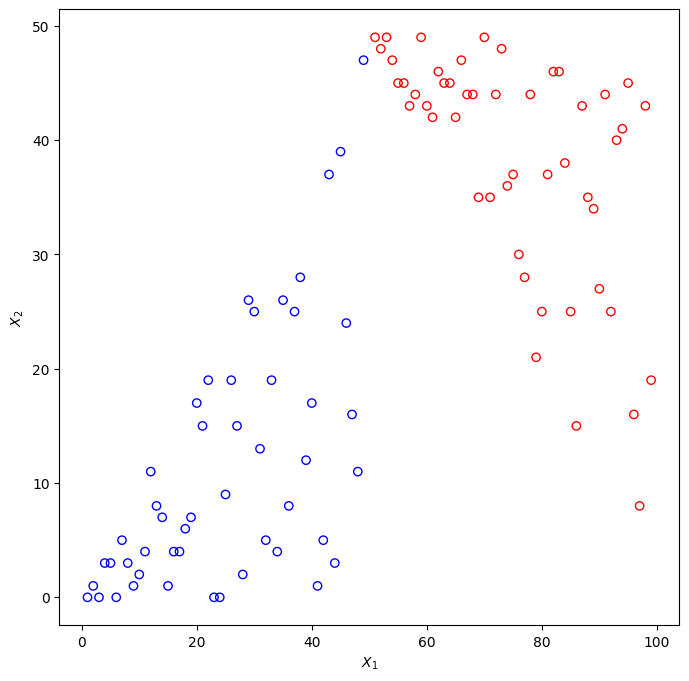

In [53]:
fig, axes = plt.subplots()
fig.set_size_inches(8, 8)

blue_x = np.arange(1, 50, step = 1)
blue_y = np.array([np.random.randint(low = 0, high = x) for x in range(1, 50)])
red_x = np.arange(51, 100, step = 1)
red_y = np.array([np.random.randint(low = x, high = 50) for x in range(49, 0, -1)])

axes.scatter([blue_x, red_x], [blue_y, red_y], edgecolor =  np.repeat(['b', 'r'], [len(blue_x), len(red_x)]), color = "none")
axes.set_xlabel("$X_1$")
axes.set_ylabel("$X_2$")

plt.show()

In [48]:
len(blue_x), len(red_x), len(blue_y), len(red_y)

(49, 49, 49, 49)

In [54]:
# logistic regression models will make predictions based on a learned decision boundary

# ___$f(\overrightarrow{x}) = s(\overrightarrow{w} \cdot \overrightarrow{x} + b)$___
# ___$f(\overrightarrow{x}) = \frac{1}{1 + e^{(\overrightarrow{w} \cdot \overrightarrow{x} + b)}}$___

In [56]:
# since we only have two predictors x_1 and x_2

# ___$f(\overrightarrow{x}) = s(w_1x_1 + w_2x_2 + b)$___
# ___$f(\overrightarrow{x}) = \frac{1}{1 + e^{(w_1x_1 + w_2x_2 + b)}}$___

In [60]:
# imagine a clasification problem where the probability can be any real number, including negative numbers
# and the weights w_1 is 1, w_2 is 1 and b is -3

## ___$w_1 = 1.0, w_2 = 1.0, b = -3.0$___
# ___$\set{P(True) \in \mathbb{R}}$___

In [62]:
# say that we have two classes with labels 0 and 1
# if the predicted probability is >= 0, we classify that record as 1
# if the predicted probability is < 0, we classify that record as 0

# ___$\overrightarrow{w} \cdot \overrightarrow{x} + b = 0$___

In [63]:
# this is the transitional boundary where we are not sure where to group the record!
# this line is called the decision boundary.

In [65]:
# for our model, the decision boundary is 

# ___$x_1 + x_2 -3 = 0$___

In [66]:
# so

# ___$x_1 + x_2  = 3$___

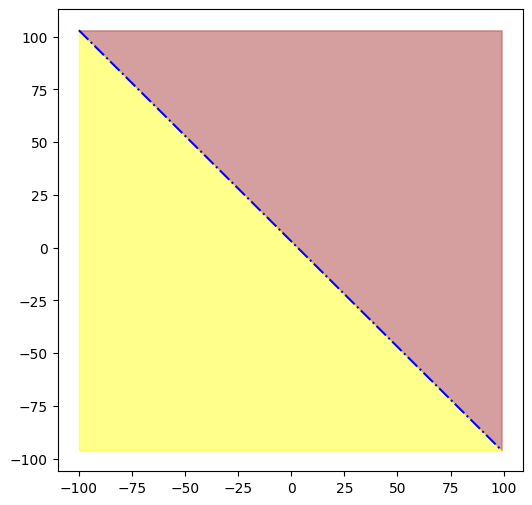

In [96]:
# how'd we plot this boundary?

x_1 = np.arange(-100, 100)
x_2 = 3 - x_1

fig, axes = plt.subplots()
fig.set_size_inches(6, 6)
axes.plot(x_1, x_2, color = "blue", linestyle = "-.")
axes.fill_between(x = x_1, y1 = x_2, y2 = axes.get_ylim()[1] - 10, color = "brown", alpha = 0.45)
axes.fill_between(x = x_1, y1 = axes.get_ylim()[0] + 10, y2 = x_2, color = "yellow", alpha = 0.45)
plt.show()

In [97]:
# logistic regression will predict 0 if the data point is in the yellow area (i.e P < 0)
# logistic regression will predict 1 if the data point is located in the brown area, i.e P >= 1

In [ ]:
# Non-linear decision boundaries